## **Saudi Arabia Used Cars**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

Sumber Data : capstone 3 PURWADHIKA

Author : Galih Pranata Ari/11.08.2024

### **Business Problem Understanding**

**Context**
Permasalahan dari topik terkait penggunaan mobil di Arab Saudi terkait dengan analisis dan prediksi harga mobil bekas yang diiklankan di syarah.com. Tujuan utama dari analisis diantaranya :

**Penetapan Harga yang Kompetitif:**

Masalah: Dealer dan penjual mobil bekas perlu menetapkan harga yang kompetitif agar dapat menarik pembeli, namun tetap menguntungkan bagi mereka. Harga yang terlalu tinggi bisa mengurangi daya tarik mobil, sedangkan harga yang terlalu rendah bisa mengurangi margin keuntungan.

Solusi : Analisis data yang ada, penjual dapat menentukan harga optimal berdasarkan faktor-faktor seperti merek, model, tahun pembuatan, ukuran mesin, dan jumlah jarak tempuh mobil.

**Identifikasi Faktor yang Mempengaruhi Harga:**

Masalah: Penjual dan pembeli mungkin tidak mengetahui semua faktor yang secara signifikan mempengaruhi harga mobil bekas.

Solusi : Analisis data ini bisa membantu dalam mengidentifikasi variabel mana yang paling berpengaruh terhadap harga, seperti tipe mobil, ukuran mesin, asal mobil, dan lain-lain.

**Optimasi Stok dan Penawaran:**

Masalah: Dealer perlu memahami permintaan pasar untuk berbagai tipe mobil bekas agar dapat mengelola stok dengan lebih baik dan menargetkan penawaran yang relevan.

Solusi : Dengan menganalisis data wilayah, tipe mobil, dan permintaan berdasarkan harga, dealer dapat mengoptimalkan inventaris mereka dan menyesuaikan penawaran berdasarkan tren pasar.

**Negosiasi Harga:**

Masalah: Pembeli mungkin menginginkan negosiasi harga, tetapi penjual perlu mengetahui sejauh mana mereka bisa bernegosiasi tanpa merugi.

Solusi: Data ini dapat memberikan wawasan mengenai berapa banyak penjual lain yang menawarkan harga yang dapat dinegosiasikan, serta karakteristik mobil yang cenderung ditawarkan dengan harga yang bisa dinegosiasikan.

**Segmentasi Pasar:**

Masalah: Tidak semua mobil bekas memiliki nilai yang sama di setiap wilayah atau segmen pasar.

Solusi : Dengan menganalisis data wilayah dan tipe mobil, penjual dapat mengidentifikasi segmen pasar yang lebih menguntungkan untuk mobil tertentu.

### **Data Understanding**
| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | jenis mobil bekas yang dicatat dalam dataset |
| Region | Object | lokasi di mana mobil bekas tersebut ditawarkan untuk dijual |
| Make | Object | merek mobil bekas |
| Gear_Type | Object | tipe transmisi mobil |
| Origin | Object | asal negara atau wilayah tempat mobil diproduksi |
| Options | Object | opsi tambahan atau fitur khusus yang ada pada mobil |
| Years | Integer | tahun di mana mobil diproduksi |
| Engine_Size | Float | ukuran mesin mobil dalam liter atau cc |
| Mileage | Integer | jumlah jarak yang telah ditempuh oleh mobil dalam satuan kilometer atau mil |
| Negotiable | Boolean | indikator biner (True/False) yang menunjukkan apakah harga mobil bisa dinegosiasikan atau tidak |
| Price | Integer | harga jual dari mobil bekas dalam dataset |

### **Import Library**

In [42]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

### **Load Datasheet**

In [43]:
# Load dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


### **Cleaning Data**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


### **Duplikat Data**

In [45]:
# Check for duplicated values
duplicated_rows = df[df.duplicated()]

print(f'Jumlah data Duplikat : {len(duplicated_rows)}')
duplicated_rows

Jumlah data Duplikat : 4


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


In [46]:
data = df.drop_duplicates()

### **Feature Selection**


Memilih fitur yang sesuai dengan model pada datasheet. semua fitur dalam dataset diubah menjadi format numerik sebelum melakukan feature selection, menghindari kesalahan konversi data.

In [47]:

# Identifikasi fitur kategorikal dan numerik
categorical_features = ['Make', 'Type', 'Region', 'Origin']
numerical_features = ['Engine_Size', 'Mileage', 'Year']  # tambahkan fitur numerik sesuai dataset

# Pisahkan fitur dan target
X = df.drop(columns=['Price'])
y = df['Price']

# Buat transformasi untuk fitur kategorikal dan numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Buat pipeline dengan preprocessing dan fitur selection (digunakan untuk menggabungkan langkah preprocessing dan feature selection.)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression, k='all'))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline.fit(X_train, y_train)

# Get feature scores from SelectKBest
selector = pipeline.named_steps['feature_selection']
preprocessor_transformers = pipeline.named_steps['preprocessor']
preprocessor_features = (preprocessor_transformers
                         .named_transformers_['cat']
                         .get_feature_names_out(categorical_features))
all_features = (numerical_features + list(preprocessor_features))

# Get scores and feature names
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': all_features, 'Score': scores})

# Display feature scores
print(feature_scores.sort_values(by='Score', ascending=False))

              Feature       Score
2                Year  420.865389
43      Make_Mercedes  244.299106
35    Make_Land Rover  215.105022
309  Type_Range Rover  201.976075
244           Type_LX  198.615834
..                ...         ...
337     Type_Sportage    0.001013
200    Type_Furniture    0.000809
343  Type_Sylvian Bus    0.000752
361      Type_Tuscani    0.000644
298        Type_Prius    0.000573

[418 rows x 2 columns]


#### **Interpretasi Data :**
Year: Memiliki skor tertinggi, menunjukkan bahwa tahun pembuatan mobil adalah faktor yang sangat penting dalam menentukan harga mobil.
Make_Mercedes, Make_Land Rover, dan fitur-fitur lain terkait merek mobil juga memiliki skor yang tinggi, menunjukkan bahwa merek mobil sangat mempengaruhi harga.

### **Feature Engineering**

Menciptakan fitur-fitur baru yang dapat meningkatkan performa model machine learning


In [48]:
# Feature Engineering

# 1. Membuat Fitur Baru Berdasarkan Kombinasi Fitur yang Ada
df['Engine_Size_Mileage'] = df['Engine_Size'] * df['Mileage']

# 2. Mengubah Rentang Waktu
# Misalnya, buat fitur yang menunjukkan usia mobil saat ini
current_year = pd.Timestamp.now().year
df['Car_Age'] = current_year - df['Year']

# 3. Menangani Fitur Kategorikal dengan One-Hot Encoding
categorical_features = ['Make', 'Type', 'Region', 'Origin']
numerical_features = ['Engine_Size', 'Mileage', 'Year', 'Engine_Size_Mileage', 'Car_Age']  # Tambahkan fitur baru di sini

# Pisahkan fitur dan target
X = df.drop(columns=['Price'])
y = df['Price']

# Buat transformasi untuk fitur kategorikal dan numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Buat pipeline dengan preprocessing dan fitur selection
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression, k='all'))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline.fit(X_train, y_train)

# Get feature scores from SelectKBest
selector = pipeline.named_steps['feature_selection']
preprocessor_transformers = pipeline.named_steps['preprocessor']
preprocessor_features = (preprocessor_transformers
                         .named_transformers_['cat']
                         .get_feature_names_out(categorical_features))
all_features = (numerical_features + list(preprocessor_features))

# Get scores and feature names
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': all_features, 'Score': scores})

# Display feature scores
print(feature_scores.sort_values(by='Score', ascending=False))

              Feature       Score
2                Year  420.865389
4             Car_Age  420.865389
45      Make_Mercedes  244.299106
37    Make_Land Rover  215.105022
311  Type_Range Rover  201.976075
..                ...         ...
339     Type_Sportage    0.001013
202    Type_Furniture    0.000809
345  Type_Sylvian Bus    0.000752
363      Type_Tuscani    0.000644
300        Type_Prius    0.000573

[420 rows x 2 columns]


#### **Interpretasi Data :**
- Year dan Car_Age: Kedua fitur ini memiliki skor yang sangat tinggi dan sama (420.87)


#### **Exploratory Data Analysis**

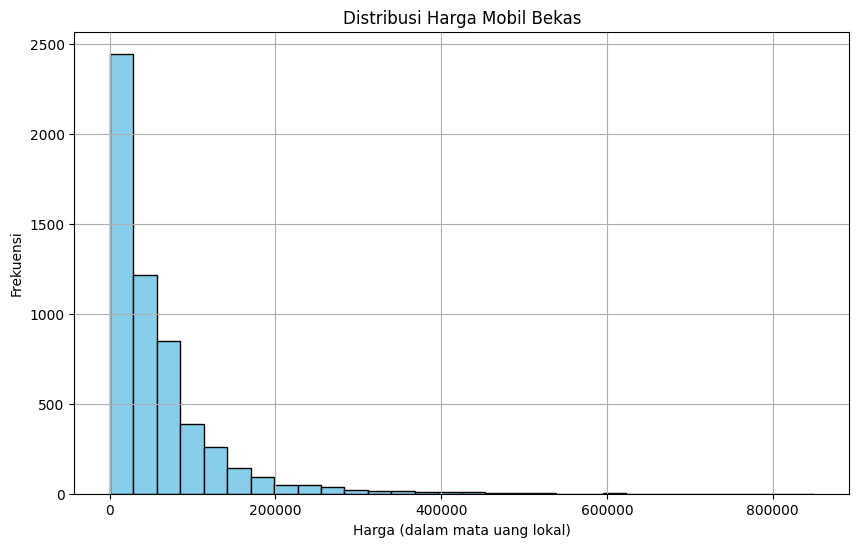

In [49]:
##melihat persebaran range harga
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Harga Mobil Bekas')
plt.xlabel('Harga (dalam mata uang lokal)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

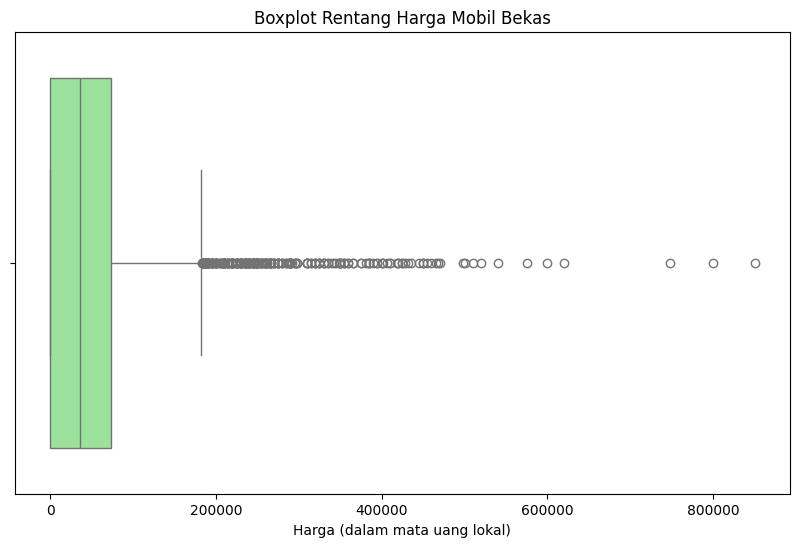

In [50]:
# Membuat boxplot untuk rentang harga mobil bekas
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'], color='lightgreen')
plt.title('Boxplot Rentang Harga Mobil Bekas')
plt.xlabel('Harga (dalam mata uang lokal)')
plt.show()

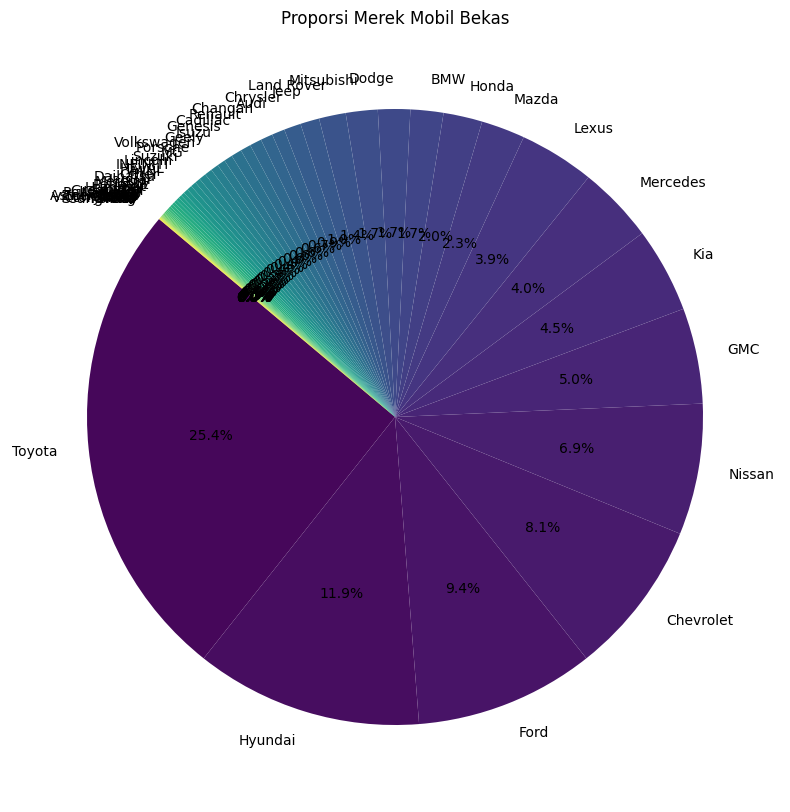

In [51]:
# Menghitung jumlah mobil untuk setiap merek
make_counts = df['Make'].value_counts()
# Membuat pie chart untuk proporsi merek kendaraan
plt.figure(figsize=(10, 10))
plt.pie(make_counts.values, labels=make_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(make_counts)))
plt.title('Proporsi Merek Mobil Bekas')
plt.show()

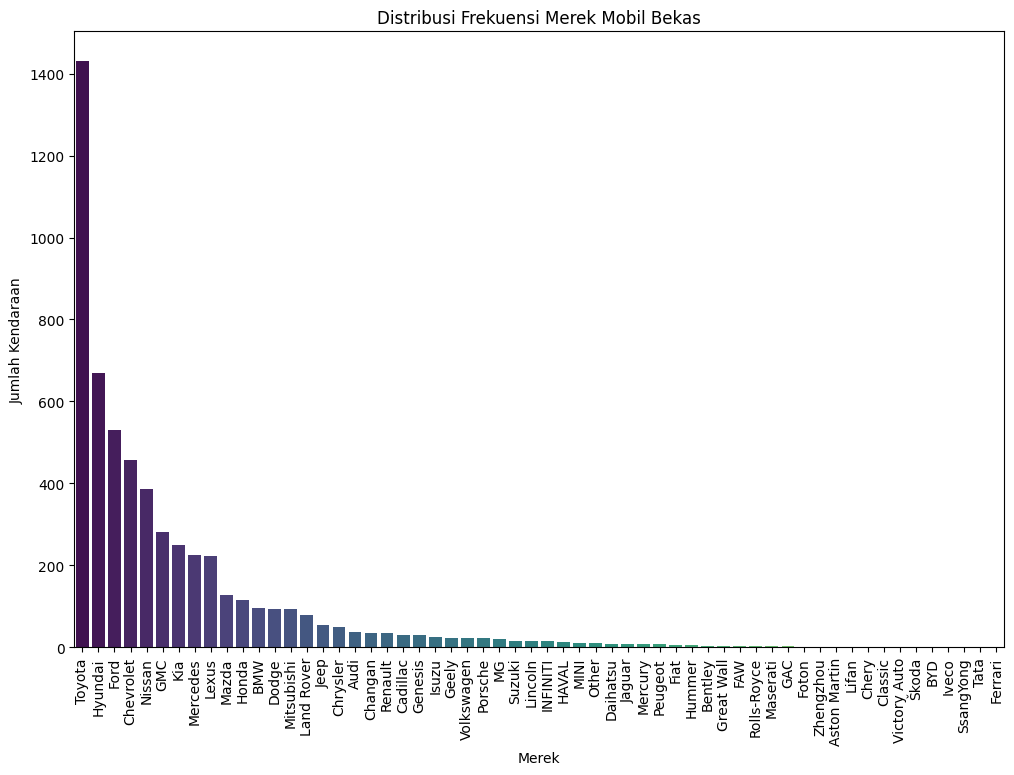

In [52]:
# Membuat bar plot untuk merek kendaraan
plt.figure(figsize=(12, 8))
sns.barplot(x=make_counts.index, y=make_counts.values, palette='viridis')
plt.title('Distribusi Frekuensi Merek Mobil Bekas')
plt.xlabel('Merek')
plt.ylabel('Jumlah Kendaraan')
plt.xticks(rotation=90)  # Memutar label x agar mudah dibaca
plt.show()

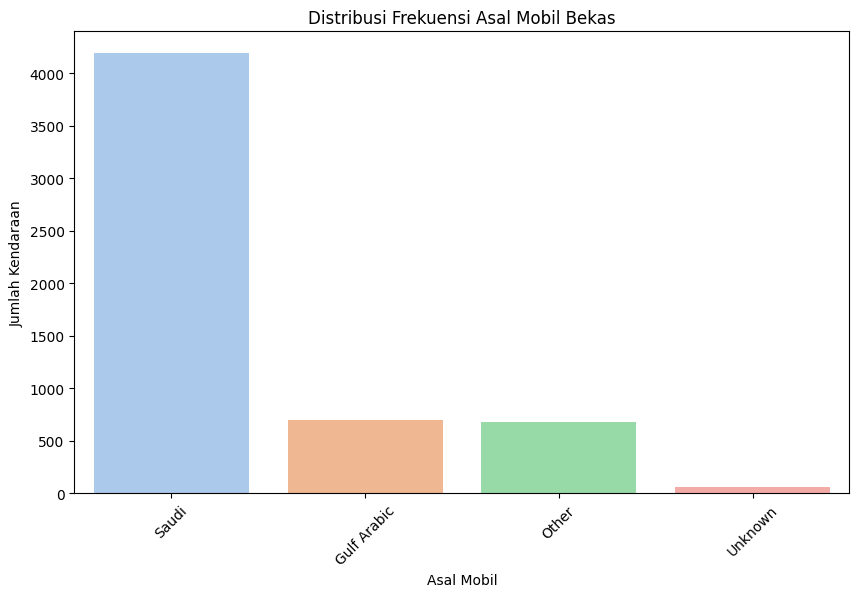

In [53]:
# Menghitung jumlah mobil untuk setiap asal
origin_counts = df['Origin'].value_counts()

# Membuat bar plot untuk asal mobil
plt.figure(figsize=(10, 6))
sns.barplot(x=origin_counts.index, y=origin_counts.values, palette='pastel')
plt.title('Distribusi Frekuensi Asal Mobil Bekas')
plt.xlabel('Asal Mobil')
plt.ylabel('Jumlah Kendaraan')
plt.xticks(rotation=45)  # Memutar label x agar mudah dibaca
plt.show()

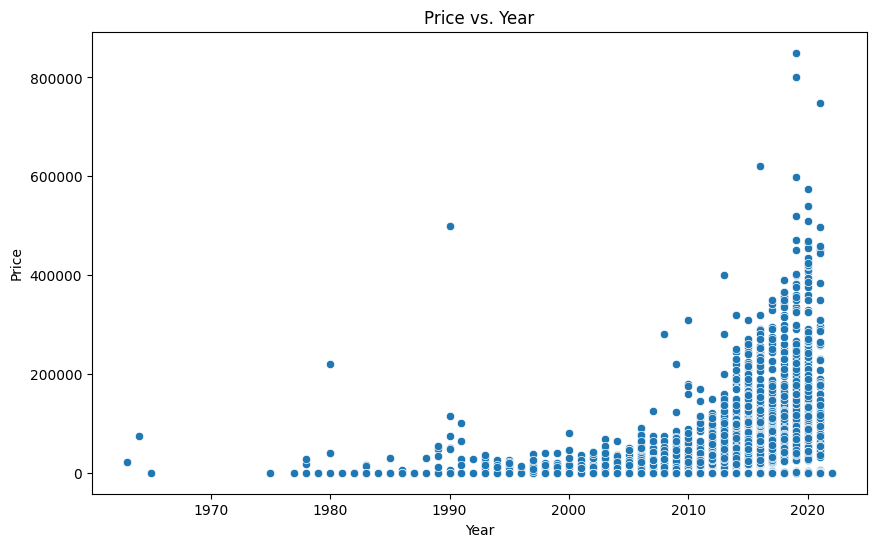

In [102]:
#Price vs. Year:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Price')
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

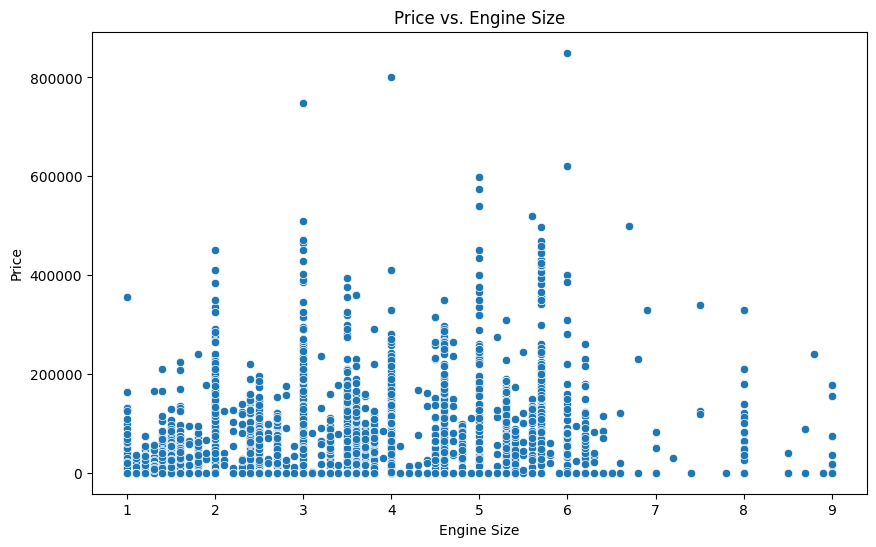

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine_Size', y='Price')
plt.title('Price vs. Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

## **Data Corelation**

Gear_Type              object
Options                object
Year                    int64
Engine_Size           float64
Mileage                 int64
                       ...   
Region_Yanbu             bool
Origin_Gulf Arabic       bool
Origin_Other             bool
Origin_Saudi             bool
Origin_Unknown           bool
Length: 445, dtype: object
Kolom non-numerik yang tersisa: Index(['Gear_Type', 'Options', 'Negotiable', 'Make_Aston Martin', 'Make_Audi',
       'Make_BMW', 'Make_BYD', 'Make_Bentley', 'Make_Cadillac', 'Make_Changan',
       ...
       'Region_Sabya', 'Region_Sakaka', 'Region_Tabouk', 'Region_Taef',
       'Region_Wadi Dawasir', 'Region_Yanbu', 'Origin_Gulf Arabic',
       'Origin_Other', 'Origin_Saudi', 'Origin_Unknown'],
      dtype='object', length=439)


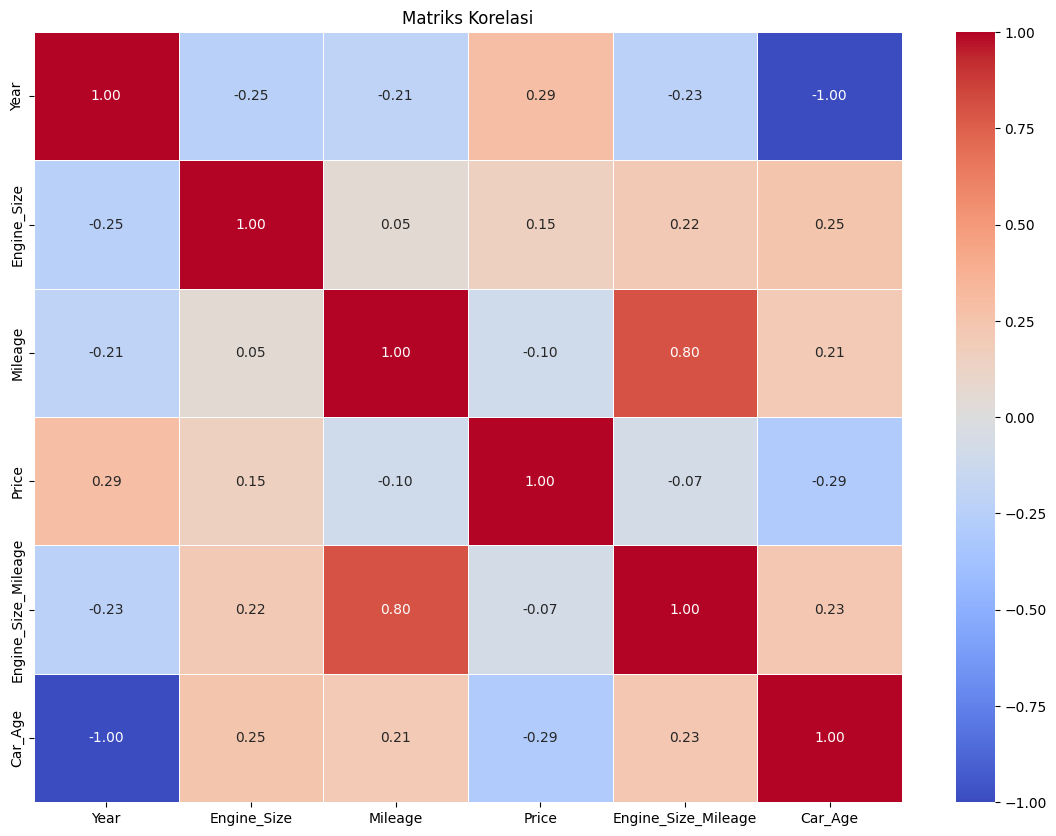

In [54]:
# Encode fitur kategorikal menggunakan OneHotEncoder
df_encoded = pd.get_dummies(df, columns=['Make', 'Type', 'Region', 'Origin'])

# Periksa jenis data dari setiap kolom
print(df_encoded.dtypes)

# Periksa apakah ada kolom yang tidak bertipe numerik
non_numeric_columns = df_encoded.select_dtypes(exclude=['number']).columns
print("Kolom non-numerik yang tersisa:", non_numeric_columns)

# Hapus kolom non-numerik jika ada
df_encoded = df_encoded.drop(columns=non_numeric_columns, errors='ignore')

# Pastikan tidak ada nilai yang tidak konsisten atau missing values
df_encoded = df_encoded.dropna()

# Hitung matriks korelasi
correlation_matrix = df_encoded.corr()

# Visualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

**Outliers Detection**

<Axes: >

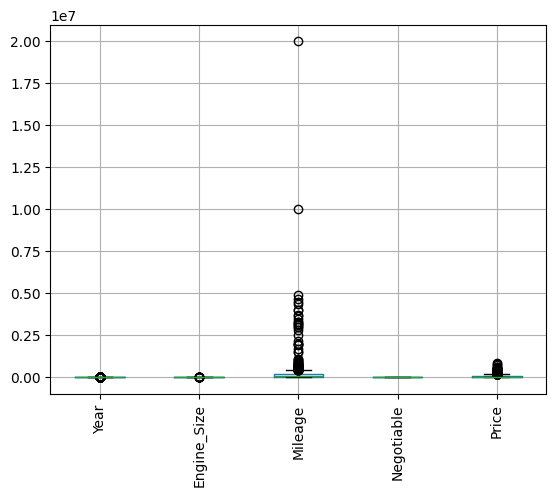

In [55]:
# Plot boxplot untuk mengecek outliers
data.boxplot(rot=90)

In [56]:
# Membuat fungsi untuk mengecek outliers

def find_anomalies(df, feature):
    # Hitung Q1, Q3, dan IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Tentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Temukan outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    return outliers

# Temukan outliers pada fitur 'Mileage'
mileage_outliers = find_anomalies(df, 'Mileage')

# Tampilkan hasil
print(f"Jumlah outliers pada fitur 'Mileage': {len(mileage_outliers)}")
print(mileage_outliers.head())        

Jumlah outliers pada fitur 'Mileage': 175
           Type          Region       Make  Gear_Type Origin    Options  Year  \
19      Caprice          Riyadh  Chevrolet  Automatic  Other   Standard  1983   
28   Pathfinder         Al-Ahsa     Nissan  Automatic  Saudi  Semi Full  2002   
48      Elantra          Riyadh    Hyundai     Manual  Saudi  Semi Full  2011   
62          SEL          Tabouk   Mercedes  Automatic  Saudi       Full  1986   
104       C5700  Hafar Al-Batin        GMC     Manual  Saudi   Standard  1977   

     Engine_Size  Mileage  Negotiable  Price  Engine_Size_Mileage  Car_Age  
19           1.0   500000        True      0             500000.0       41  
28           3.3   550000       False  10000            1815000.0       22  
48           1.6   600000        True      0             960000.0       13  
62           3.0   500000       False   5500            1500000.0       38  
104          1.5  4358765        True      0            6538147.5       47  


#### **Interpretasi Data :**
fitur Mileage menunjukkan mobil dengan jarak tempuh yang sangat tinggi dibandingkan dengan nilai-nilai umum dalam dataset. 

In [57]:
# Cek deskriptif statistik kolom Mileage
df['Mileage'].describe()

count    5.624000e+03
mean     1.509234e+05
std      3.828360e+05
min      1.000000e+02
25%      3.800000e+04
50%      1.030000e+05
75%      1.960000e+05
max      2.000000e+07
Name: Mileage, dtype: float64

In [58]:
# Filter data dengan harga di atas 100.000 dan mileage di bawah 50.000
filtered_data = df[(df['Price'] > 100000) & (df['Mileage'] < 50000)]

# Tampilkan hasil filtering
print(filtered_data)

              Type  Region      Make  Gear_Type       Origin    Options  Year  \
13              FJ  Riyadh    Toyota  Automatic        Saudi  Semi Full  2020   
35               A  Riyadh  Mercedes  Automatic        Other   Standard  2021   
51           The 5  Jeddah       BMW  Automatic        Saudi   Standard  2019   
56          Sonata  Makkah   Hyundai  Automatic        Saudi       Full  2020   
74             GLC  Dammam  Mercedes  Automatic  Gulf Arabic       Full  2020   
...            ...     ...       ...        ...          ...        ...   ...   
5555            S8  Dammam      Audi  Automatic  Gulf Arabic       Full  2016   
5589  Land Cruiser  Tabouk    Toyota  Automatic  Gulf Arabic       Full  2013   
5601         Macan  Jeddah   Porsche  Automatic        Saudi  Semi Full  2018   
5616           CX9  Qassim     Mazda  Automatic        Saudi       Full  2020   
5621         Yukon  Dammam       GMC  Automatic        Saudi       Full  2016   

      Engine_Size  Mileage 

#### **Interpretasi Data :**
Mobil bekas yang relatif baru dan dengan harga tinggi, namun memiliki jarak tempuh yang rendah. Ini mungkin mengindikasikan mobil-mobil premium atau dalam kondisi sangat baik, dan dapat menarik minat pembeli yang mencari mobil bekas dengan harga tinggi tetapi dengan penggunaan yang minimal.

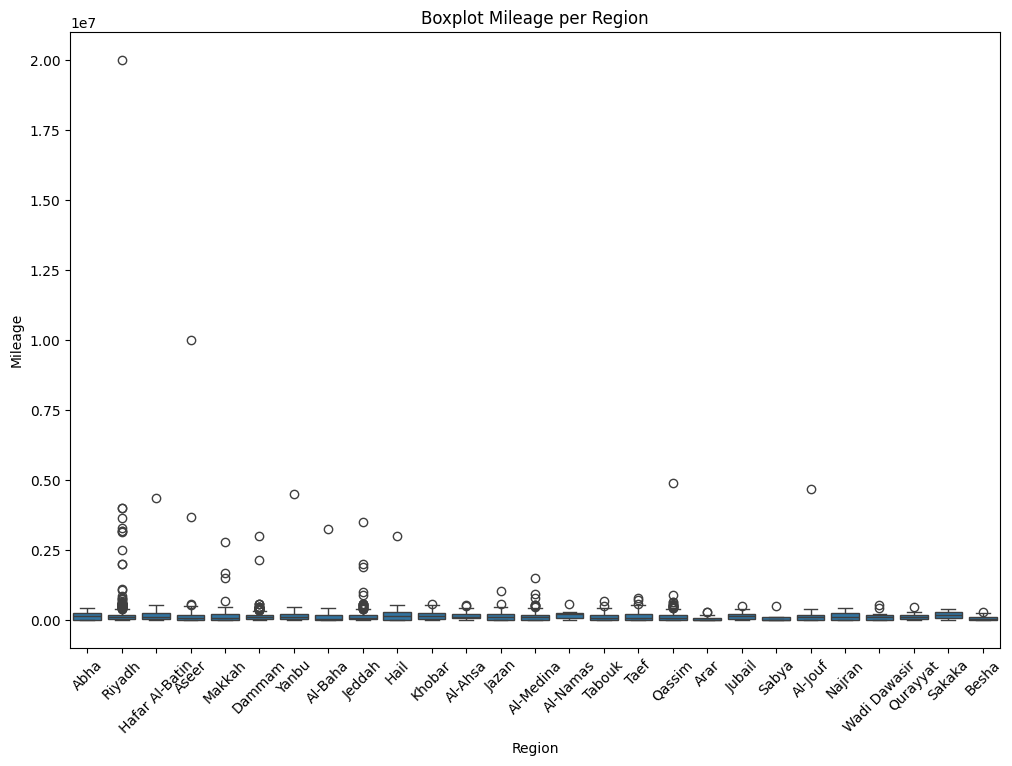

In [59]:
# Visualisasi boxplot mileage per region
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Mileage', data=df)
plt.title('Boxplot Mileage per Region')
plt.xticks(rotation=45)
plt.show()

### **Modeling**

Proses penerapan model statistik atau pembelajaran mesin untuk memprediksi nilai atau membuat keputusan berdasarkan data. Pda proses Label encoding dilakukan dengan merubah format kategorikal menjadi format numerik

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [61]:
# Ubah Kategorikal menjadi numeric
# Membuat instance LabelEncoder
label_encoder = LabelEncoder()

# Fitur yang akan diencode
categorical_features = ['Make', 'Type', 'Region', 'Origin']

# Mengubah setiap fitur kategorikal menjadi numerik
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Tampilkan beberapa data setelah Label Encoding
print(df.head())

   Type  Region  Make  Gear_Type  Origin    Options  Year  Engine_Size  \
0    98       0    53     Manual       2   Standard  2013          1.4   
1   340      20    19  Automatic       2       Full  2014          8.0   
2   262      20    33  Automatic       0       Full  2015          5.0   
3   231      10    32  Automatic       2  Semi Full  2015          2.4   
4   142      20    53  Automatic       2       Full  2020          4.0   

   Mileage  Negotiable   Price  Engine_Size_Mileage  Car_Age  
0   421000        True       0             589400.0       11  
1    80000       False  120000             640000.0       10  
2   140000       False  260000             700000.0        9  
3   220000       False   42000             528000.0        9  
4    49000        True       0             196000.0        4  


In [104]:
# Splitting Data
# Memisahkan fitur dan target
X = df_encoded.drop(columns=['Price'])  # Menghapus kolom target dari fitur
y = df_encoded['Price']  # Target adalah harga mobil

# Membagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data train/pelatihan:", X_train.shape[0])
print("Jumlah data test:", X_test.shape[0])

Jumlah data train/pelatihan: 4499
Jumlah data test: 1125


Data Train : Sebagai model prediksi harga mobil berdasarkan fitur yang ada
Data Pengujian : Evaluasi kinerja mopbil. Sebagai prediksi dalam mengukur seberapa baik model prediksi harga pada data yang baru

## **Benchmark Model**

Pemodelan yang dilakukan untuk evaluasi tehadap model yang lebih kompleks. Sehingga pada proses ini akan memberikan titik referensi yang kemudian dilakukan perbandingan

In [70]:

# Fungsi untuk menghitung MAPE (Mean Absolute Percentage Error): 
# Mengukur seberapa besar kesalahan prediksi sebagai persentase dari nilai sebenarnya.
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Transformasi logaritmik pada target
y_log = np.log1p(y)

# Membagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Definisi algoritme
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Evaluasi model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Inverse transform log
    y_pred_exp = np.expm1(y_pred)
    y_test_exp = np.expm1(y_test)
    
    # Hitung metrik
    rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
    mae = mean_absolute_error(y_test_exp, y_pred_exp)
    mape = mean_absolute_percentage_error(y_test_exp, y_pred_exp)
    
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }

# Menampilkan hasil benchmark
results_df = pd.DataFrame(results).T
print(results_df)

                                RMSE           MAE  MAPE
Linear Regression       86734.022929  51356.095851   inf
Decision Tree           85400.840018  49723.382989   inf
Random Forest           81401.544438  47529.409720   inf
Support Vector Machine  63603.620979  36680.322218   inf
K-Nearest Neighbors     80675.693651  45864.323918   inf


- RMSE (Root Mean Squared Error): Mengukur seberapa besar rata-rata kesalahan prediksi dalam unit yang sama dengan target.
- MAE (Mean Absolute Error): Mengukur rata-rata selisih absolut antara nilai yang diprediksi dan nilai sebenarnya
- MAPE (Mean Absolute Percentage Error): Mengukur seberapa besar kesalahan prediksi sebagai persentase dari nilai sebenarnya.

## **HYPERPARAMETER TUNING**

Proses untuk memilih set parameter yang optimal untuk model machine learning. Tujuannya membantu model mencapai kinerja terbaiknya.

In [82]:
import sklearn
print(sklearn.__version__)


1.5.1


In [83]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
import sklearn

In [93]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [96]:
# Membuat model BaggingRegressor dengan LinearRegression sebagai estimator
bagging_model = BaggingRegressor(estimator=LinearRegression(), random_state=42)

# Definisikan parameter untuk Grid Search
param_grid_bagging = {
    'n_estimators': [10, 20, 30, 50], #Jumlah model yang akan dilatih
    'max_samples': [0.5, 0.7, 1.0], #Proporsi data pelatihan yang digunakan untuk melatih setiap estimator.
    'max_features': [0.5, 0.7, 1.0] #Proporsi fitur yang digunakan untuk melatih setiap estimator.
}

# Grid Search untuk model BaggingRegressor
#Mengoptimalkan hyperparameter model dengan mencoba berbagai kombinasi dari parameter
grid_search_bagging = GridSearchCV(estimator=bagging_model, param_grid=param_grid_bagging, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_bagging.fit(X_train_scaled, y_train)

# Model terbaik
best_bagging_model = grid_search_bagging.best_estimator_
y_pred = best_bagging_model.predict(X_test_scaled)

# Prediksi pada test set
y_pred = best_bagging_model.predict(X_test_scaled)

# Hitung metrik
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Hasil hyperparameter tuning
results = {
    'Best Parameters': grid_search_bagging.best_params_,
    'RMSE': rmse, #Root Mean Squared Error, ukuran kesalahan prediksi.
    'MAE': mae, #Mean Absolute Error, rata-rata selisih absolut antara nilai yang diprediksi dan nilai sebenarnya.
    'MAPE': mape #Mean Absolute Percentage Error, rata-rata persentase kesalahan absolut.
}

# Menampilkan hasil
results_df = pd.DataFrame([results])
print("\nBagging with Linear Regression - Hyperparameter Tuning Results:")
print(results_df)


Bagging with Linear Regression - Hyperparameter Tuning Results:
                                     Best Parameters     RMSE       MAE  \
0  {'max_features': 0.5, 'max_samples': 0.7, 'n_e...  5.05296  4.635694   

           MAPE  
0  1.053792e+16  


- BaggingRegressor dilakukan metode ensemble yang menggunakan teknik Bootstrap Aggregating (Bagging) untuk mengurangi variabilitas dan overfitting
- hasil menunjukkan bahwa model dengan hyperparameter yang dioptimalkan menggunakan BaggingRegressor dan LinearRegression

### **Conclusion**
- Benchmarking menggunakan 5 model regresi (Linier, pohon keputusan, random forest, support vector dan K-Nearest). Hasil nilai dari Regresi Random forest didapatkan nilai RMSE sebesar 81.401,54 dan MAE 47.529,41. Kondisi ini termasuk dalam kondisi akurat data
- Adanya fitur Engine_size_Mileage dan Car_age mampu meningkatkan kinerja keseluruhan model dalam hubungan atribut matrik
- Year dan Car_age berpengaruh terhadap prediksi harga jual mobil
- Oulier tertinggi pada Mileage, dimana perlu dilakukan pemodelan prediksi dan penghapusan sebagian outlier
Bagging dengan Regresi Linier didapatkan hasil pada Grid search mendapat parameter max_features = 0.5 dan max_samples=0.7 serta N-estimators=30.  Hal ini nilai RMSE = 5.05, MAE = 4.64
- rekayasa prediksi terhadap pemilihan model, rekayasa fitur, dan setelan hyperparameter dinilai lebih prediktif dalam menentukan estimasi harga mobil



### **Recomandation**
- Untuk meningkatkan kualitas Data, maka perlu adanya pengaturan terhadap outlier data. dalam kasus ini adalah Mileage. serta melakukan filtering dan cleaning data agar tidak terjadi data ganda dan data 0
- Penggunaan rekayasa fitur tambahan dalam mobil dapat meningkatkan harga. Dalam konteks ini bisa menawarkan servis tambhan berupa servis atau penambhan hal lainnya
- Perlu dilakukan uji terhadap model gradient boosting dan XGboost agar menambah keakuratan data
- Menetapkan harga mobil yang kompetitif agar menarik pelanggan dan menjaga keuntungan. Dalam hal ini bisa dilakukan dengan prediksi harga
- Berfokus pada Year, Car_age, dan Make dalam melakukan pembelian dan penjualan karena hal ini dirasa mampu memberikan gambaran secara umum kebutuhan 
- Melakukan analisis lebih lanjut dengan mempertimbangkan pada wilayah dan segmen. Dalam konteks ini disesuaikan dengan strategi harga berdasarkan wilayah



In [105]:
import pickle

In [106]:
# Simpan model ke file
with open('best_bagging_model.pkl', 'wb') as file:
    pickle.dump(best_bagging_model, file)